# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.callbacks import CSVLogger
from keras.regularizers import l1, l2
import matplotlib.pyplot as plt
%matplotlib inline

# Some sklearn imports to compare models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


Let's get a baseline estimate for accuracy.

In [4]:
y_train.mean()

0.5

So anything above 50% accuracy is better than chance.

## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [5]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [6]:
np.max(x_train)

1.0

And we'll also one-hot encode the output.

In [7]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 3b. Some baseline models to compare with

Let's train a single decision tree and random forest to get some baseline accuracy results using alternative models we have seen before.

In [133]:
shuffle_split = ShuffleSplit(n_splits=3, test_size=0.2)
tree = DecisionTreeClassifier(max_depth=15, random_state=42)
forest = RandomForestClassifier(n_estimators=500, random_state=42)
gradient = GradientBoostingClassifier(random_state=42)
tree_scores = [gradient.fit(x_train[train], y_train[train,1]).score(x_train[test], y_train[test, 1]) for train, test in shuffle_split.split(x_train)]

In [134]:
np.mean(tree_scores)

0.80873333333333319

## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [25]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()
# TODO: Compile the model using a loss function and an optimizer.
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               128128    
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 130       
Total params: 136,514
Trainable params: 136,514
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

,acc,loss,val_acc,val_loss
epoch,,,,
0,0.71245,0.544549,0.8474,0.355492
1,0.84455,0.367491,0.8614,0.328937
2,0.86190,0.325934,0.8584,0.322698
3,0.87850,0.294871,0.8610,0.324422
4,0.89230,0.271500,0.8624,0.326675
5,0.90175,0.243730,0.8568,0.340208
6,0.91650,0.214277,0.8588,0.357252
7,0.92870,0.186257,0.8566,0.386089
8,0.93825,0.166441,0.8530,0.403159


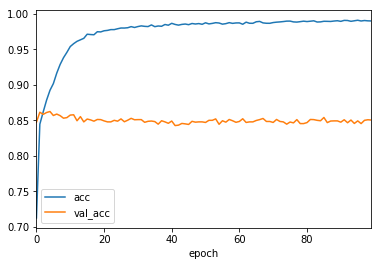

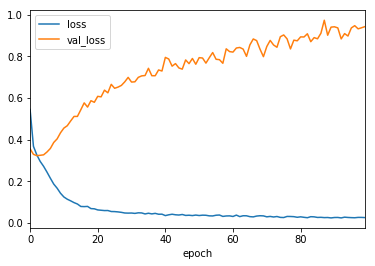

In [26]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False,
          validation_split=0.2, callbacks=[CSVLogger('logs/IMDB.log')])

# Plot training results
import pandas as pd
import matplotlib.pyplot as plt
training_log = pd.read_csv('logs/IMDB.log', index_col=0)
display(training_log)
training_log[['acc', 'val_acc']].plot()
training_log[['loss', 'val_loss']].plot()
plt.show()

## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.85128
